In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
base_dir = os.path.dirname(os.path.abspath("..\data"))
path = os.path.join(base_dir, r"data")
os.chdir(path) 

In [3]:
df = pd.read_csv("Cleaned data\data.csv")
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'HUMIDITY', 'WINDSPEED', 'DATE', 'TOTALDEMAND',
       'HOLIDAY', 'MIN', 'MAX', 'SOLAR', 'TEMPAVE', 'RRP', 'FORECASTDEMAND',
       'OUTPUT', 'MONTHDATE', 'WEEKDAY', 'WEEKEND'],
      dtype='object')

## Descriptive Statistics

In [4]:
cols = ['HUMIDITY', 'WINDSPEED', 'TOTALDEMAND', 'SOLAR', 'RRP', 'FORECASTDEMAND', 'OUTPUT', 'TEMPAVE']
describe = df[cols].agg(["min", "max", "mean", "median", "skew"]) #or df.describe(include = 'all')
display(describe)
target_dir = os.getcwd() + "\\Cleaned data\\"
describe.to_csv(target_dir+"DescriptiveStatistics.csv")

,HUMIDITY,WINDSPEED,TOTALDEMAND,SOLAR,RRP,FORECASTDEMAND,OUTPUT,TEMPAVE
min,0.223448,8.756757,5983.135104,1.000000,0.000000,5518.989111,12.320000,5.850000
max,0.966400,44.595238,9919.417588,32.200000,163.230000,10751.957092,458.355000,34.400000
mean,0.675363,20.158292,7839.727706,15.986890,68.132158,7825.213094,132.054688,18.529665
median,0.685640,19.220867,7758.870399,14.600000,68.393475,7732.721109,102.575000,18.650000
skew,-0.391384,0.820107,0.119798,0.416857,0.492613,0.299895,1.236534,0.212889


## Visuals

In [5]:
df_lim = df #[df["YEAR"]>=2021]

In [6]:
# set variables
Date = df_lim.DATE
Temp = df_lim.TEMPAVE
Demand = df_lim.TOTALDEMAND
Solar = df_lim.SOLAR
Output = df_lim.OUTPUT
RRP = df_lim.RRP
WindSpeed = df_lim.WINDSPEED
Humidity = df_lim.HUMIDITY
Holiday = df_lim.HOLIDAY
Weekday = df_lim.WEEKDAY
Weekend = df_lim.WEEKEND 

### Time Series Plots

#### Demand by Date

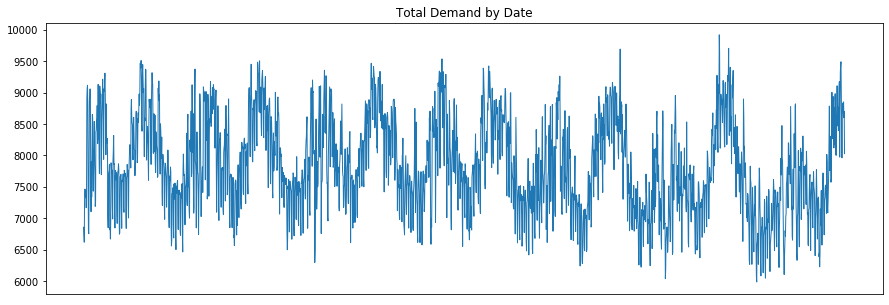

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Demand, linewidth=1)
ax.set_title("Total Demand by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show() 

#### Price by Date

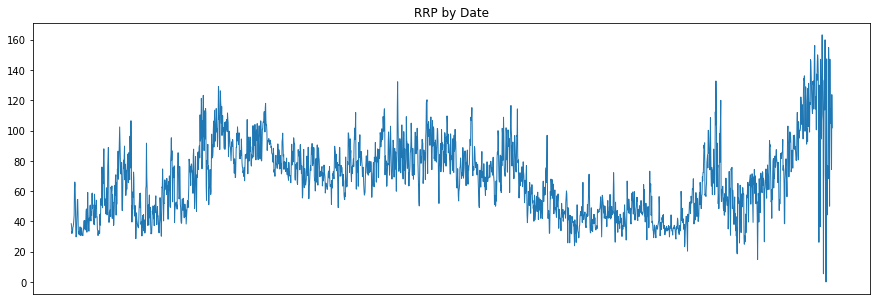

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, RRP, linewidth=1)
ax.set_title("RRP by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show() 

#### Temperature by Date

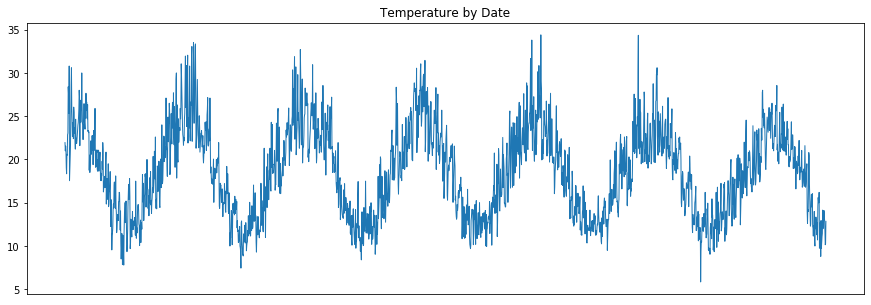

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Temp, linewidth=1)
ax.set_title("Temperature by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Solar Exposure by Date

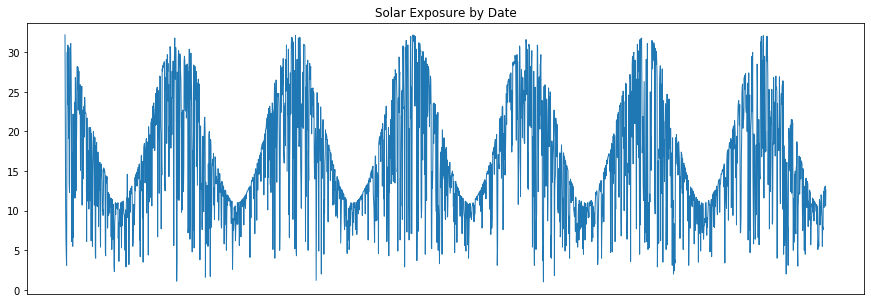

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Solar, linewidth=1)
ax.set_title("Solar Exposure by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Solar Output by Date

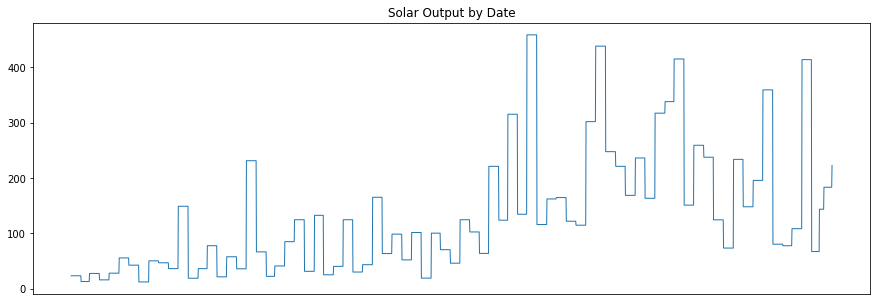

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Output, linewidth=1)
ax.set_title("Solar Output by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Humidity by Date

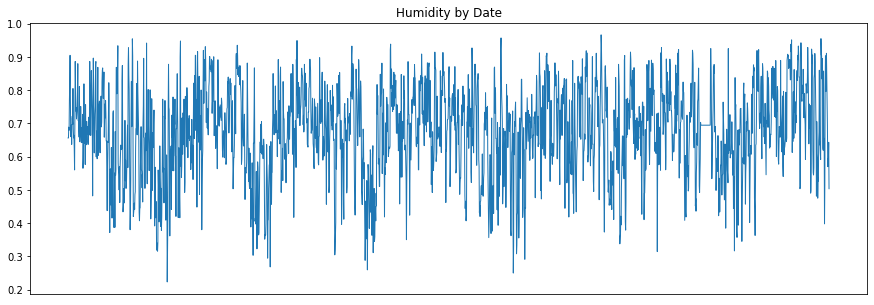

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Humidity, linewidth=1)
ax.set_title("Humidity by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

#### Windspeed by Date

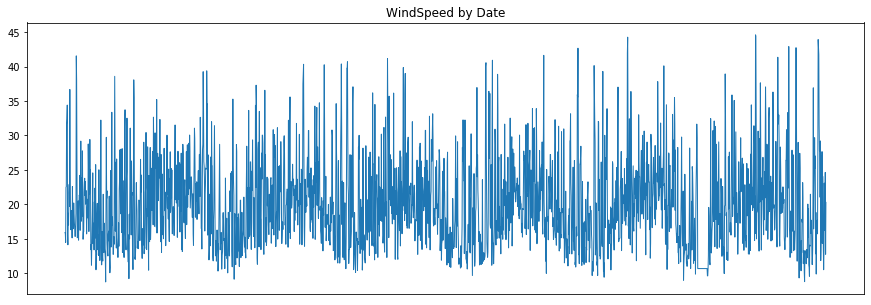

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, WindSpeed, linewidth=1)
ax.set_title("WindSpeed by Date")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

### Correlation Analysis

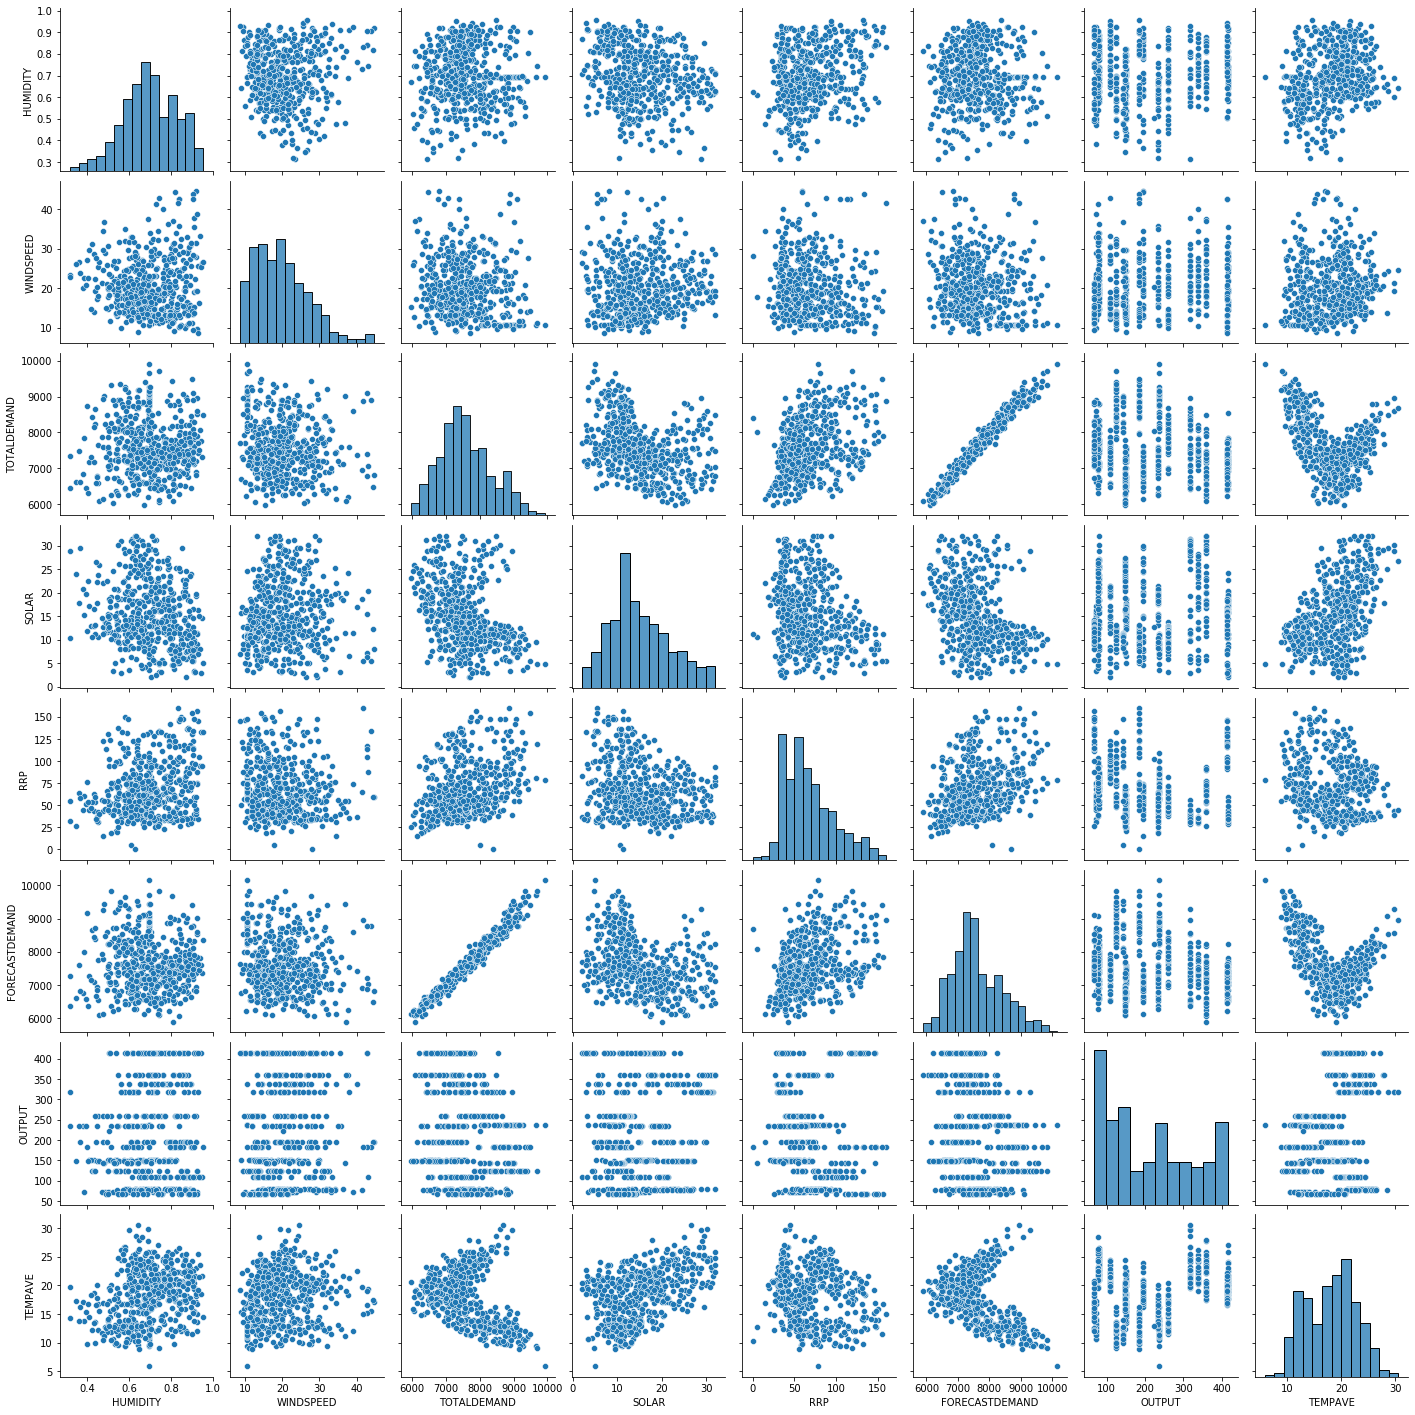

In [18]:
df_pp = df_lim.copy()
df_pp = df_pp[df_pp.YEAR >= 2021]
df_pp = df_pp[cols].dropna() 
sns.pairplot(data=df_pp)
plt.show()

### Outlier Analysis

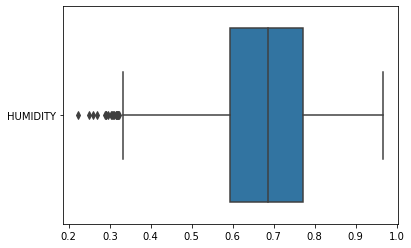

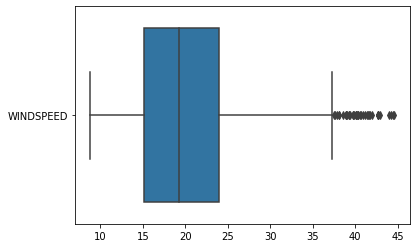

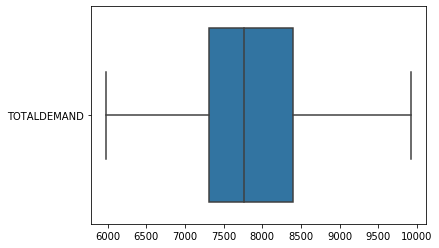

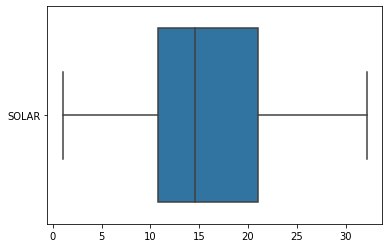

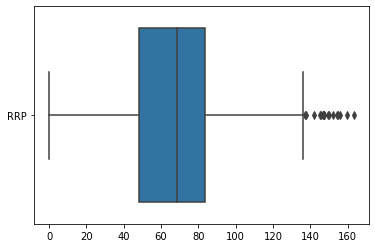

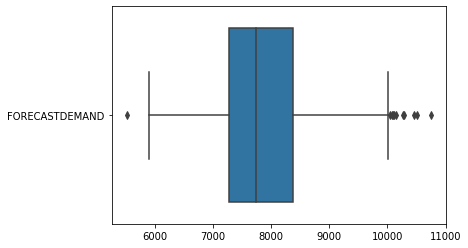

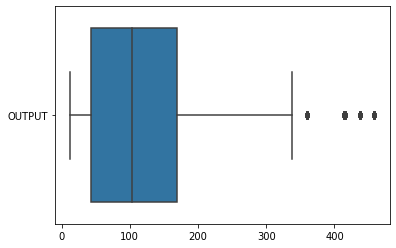

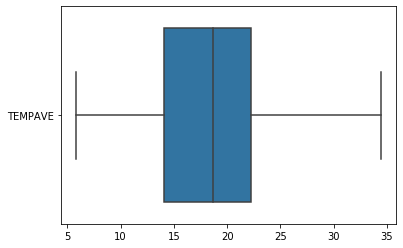

In [15]:
df_box = df_lim[cols]
for col in df_box.columns:
    sns.boxplot(data=df_box[[col]], orient="h")
    plt.show() 